DBSCAN with eps=0.1, min_samples=1, Silhouette Score: 0.22490007509932444
DBSCAN with eps=0.1, min_samples=3, Silhouette Score: -0.5286075673244794
DBSCAN with eps=0.1, min_samples=5, Silhouette Score: -0.00620177891854347
DBSCAN with eps=0.2, min_samples=1, Silhouette Score: 0.3316984789825798
DBSCAN with eps=0.2, min_samples=3, Silhouette Score: -0.3068222469332939
DBSCAN with eps=0.2, min_samples=5, Silhouette Score: -0.3957281290625129
DBSCAN with eps=0.3, min_samples=1, Silhouette Score: 0.2461857181995319
DBSCAN with eps=0.3, min_samples=3, Silhouette Score: -0.1326165797372541
DBSCAN with eps=0.3, min_samples=5, Silhouette Score: -0.4137128728452883


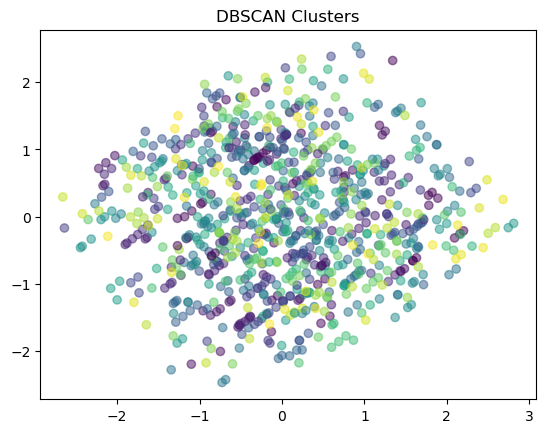

C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


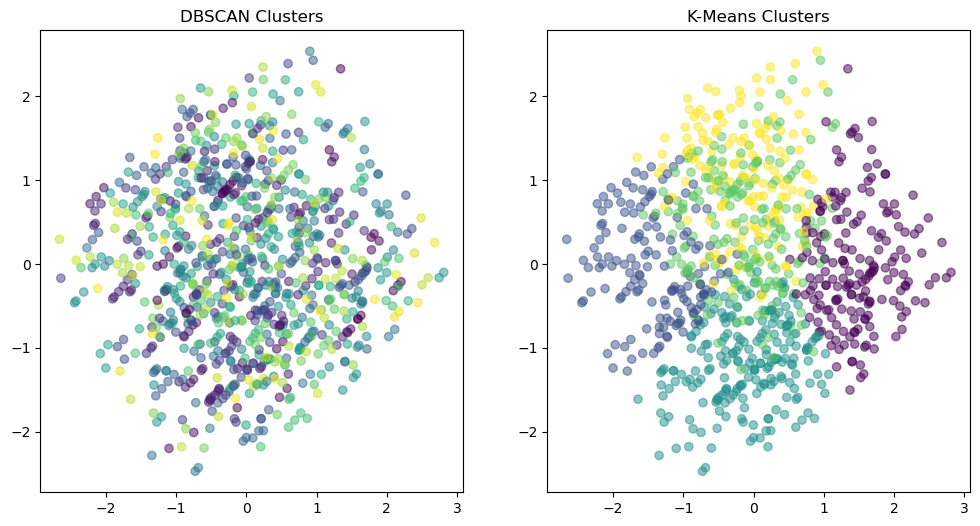

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load your dataset
# Assuming 'data' is your JSON data
# Convert the list of dictionaries to a Pandas DataFrame
df = pd.read_csv('normalization.csv')

# Data Preprocessing
# Assuming you've already performed the data cleaning and transformation steps

# Select relevant features for clustering
features_for_clustering = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Standardize numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])

# DBSCAN Clustering
# Experiment with different values of eps and MinPts
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [1, 3, 5]

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_clusters = None



# ...

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        # Check the number of unique labels
        unique_labels = np.unique(clusters)
        num_labels = len(unique_labels)

        if num_labels > 1:
            # Silhouette analysis
            silhouette_avg = silhouette_score(df_scaled, clusters)
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

            # Update the best parameters if the current configuration has a higher silhouette score
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters
        else:
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} resulted in only one cluster. Try different parameters.")

# ...


# Apply DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_clusters = best_dbscan.fit_predict(df_scaled)

# Check the number of unique labels assigned by DBSCAN
unique_labels = np.unique(best_clusters)
num_labels = len(unique_labels)

if num_labels > 1:
    # Analyze cluster characteristics
    # Explore the characteristics of each cluster
    df['DBSCAN_Cluster'] = best_clusters
    cluster_characteristics = df.groupby('DBSCAN_Cluster')[features_for_clustering].mean()

    # Visualize the clusters (you can use PCA for 2D visualization)
    pca = PCA(n_components=2)
    df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])
    df_pca['DBSCAN_Cluster'] = best_clusters

    plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.5)
    plt.title('DBSCAN Clusters')
    plt.show()
else:
    print("DBSCAN assigned only one cluster. Adjust parameters and try again.")

# Analyze cluster characteristics
# Explore the characteristics of each cluster
df['DBSCAN_Cluster'] = best_clusters
cluster_characteristics = df.groupby('DBSCAN_Cluster')[features_for_clustering].mean()

# Compare DBSCAN clusters with K-Means clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming you have determined the optimal k for K-Means
kmeans_clusters = kmeans.fit_predict(df_scaled)

# Visualize the clusters (you can use PCA for 2D visualization)
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])
df_pca['DBSCAN_Cluster'] = best_clusters
df_pca['KMeans_Cluster'] = kmeans_clusters

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('DBSCAN Clusters')
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('K-Means Clusters')
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['KMeans_Cluster'], cmap='viridis', marker='o', alpha=0.5)

plt.show()
